# Notes

This notebook plots up impact factor vs DM data in paaper quality.

The original impact factor data was created at:

Paper_Plots_Impact_Factor_Analysis.ipynb

and stored at:

/u/cwalker/Illustris_Zhang_Method/Impact_Factor_Analysis_Output/


And the DM data was created at:

Paper_Plots_Subhalo_DM_Analysis.ipynb

and stored at:

/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/


NOTE: it is important that I understand whether the DMs I calculate and plot are PHYSICAL or PROPER/COMOVING.
I think they are physical, but must check. See the comments in the tests in Paper_Plots_Subhalo_DM_Analysis.ipynb for more.


# Imports

In [12]:
import os
import numpy as np
import illustris_python as il
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from astropy.cosmology import Planck15 as cosmosource
from astropy import constants as c
from astropy import units as u

# Load the data

In [13]:
#choose simulation to process
sim_to_process = 'TNG300-1'
#simulation data path
basePath = '/virgotng/universe/IllustrisTNG/{0}/output/'.format(sim_to_process)


snap_numbers = [99,91,84,78,72,67,59,50,40,33,25,21,17]


[  10.           10.98541142   12.06792641   13.25711366   14.56348478
   15.9985872    17.57510625   19.30697729   21.20950888   23.29951811
   25.59547923   28.11768698   30.88843596   33.93221772   37.2759372
   40.94915062   44.98432669   49.41713361   54.28675439   59.63623317
   65.51285569   71.9685673    79.06043211   86.85113738   95.40954763
  104.81131342  115.13953993  126.48552169  138.94954944  152.64179672
  167.68329368  184.20699693  202.35896477  222.29964825  244.20530945
  268.26957953  294.70517026  323.74575428  355.64803062  390.69399371
  429.19342601  471.48663635  517.94746792  568.9866029   625.05519253
  686.648845    754.31200634  828.64277285  910.29817799 1000.        ]
99
91
84
78
72
67
59
50
40
33
25
21
17


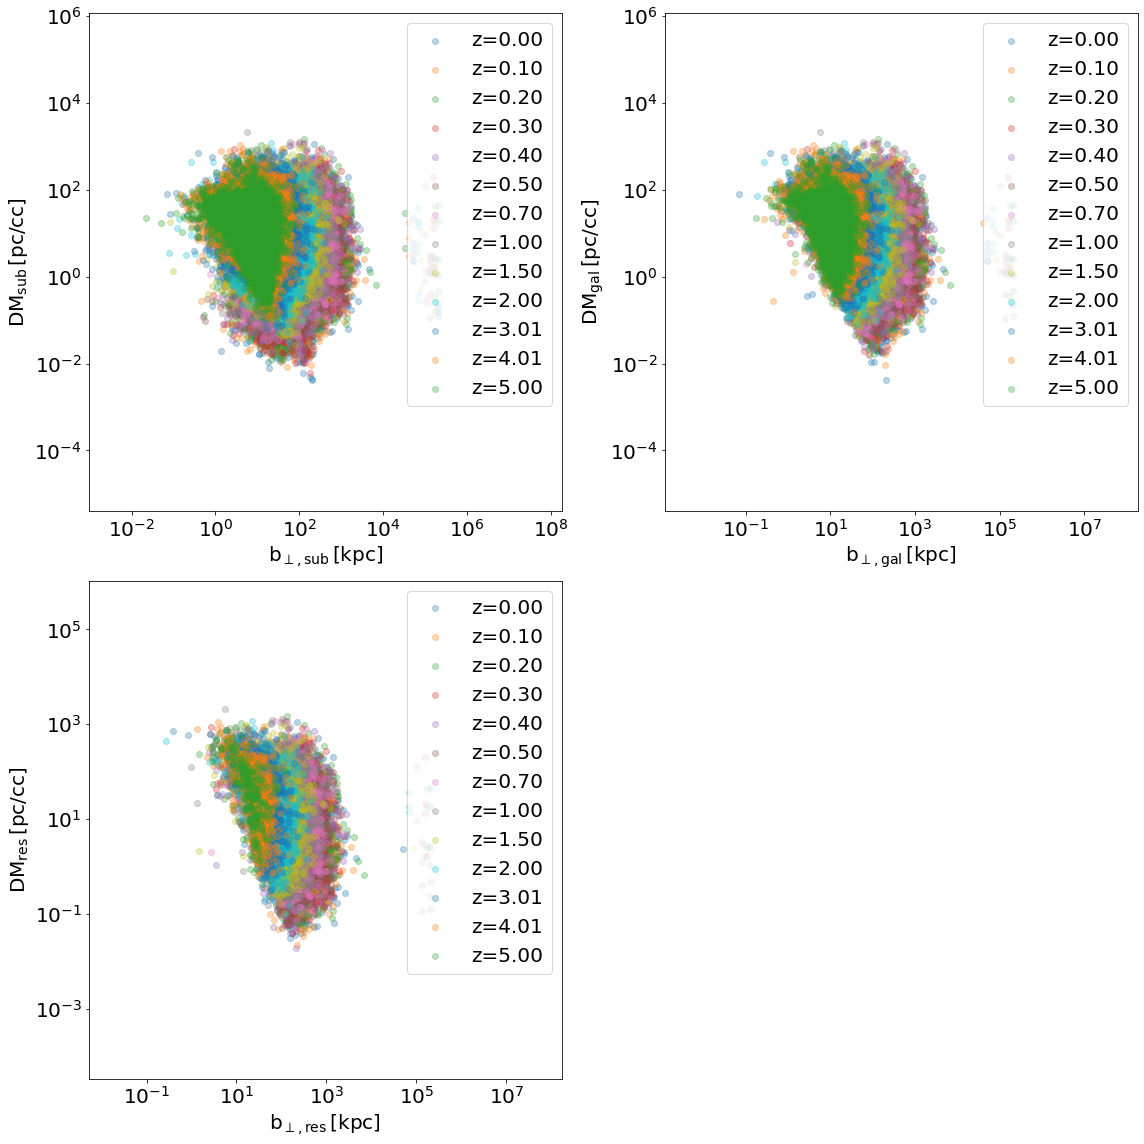

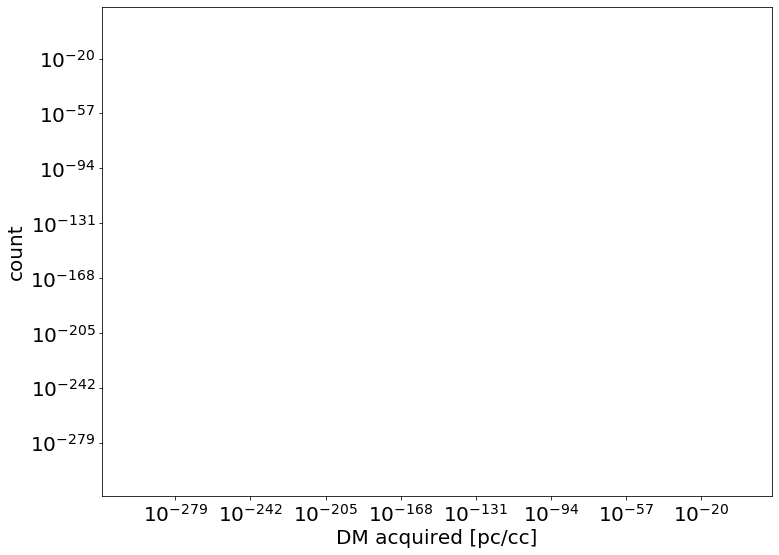

In [14]:
#############################################
#initialise figure for plotting the IF vs DM#
#############################################

fig1 = plt.figure(figsize=(16,16))
ax1 = fig1.add_subplot(221)

#ax1.set_title('Subhalos',fontsize=20)
ax1.set_xlabel(r'$\rm{b_{\perp,sub}\,[kpc]}$',fontsize=20)
ax1.set_ylabel(r'$\rm{DM_{sub}\,[pc/cc]}$',fontsize=20)
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='both',which='major',labelsize=20)

ax1b = fig1.add_subplot(222)

#ax1b.set_title('Galaxies',fontsize=20)
ax1b.set_xlabel(r'$\rm{b_{\perp,gal}\,[kpc]}$',fontsize=20)
ax1b.set_ylabel(r'$\rm{DM_{gal}\,[pc/cc]}$',fontsize=20)
ax1b.set_xscale('log')
ax1b.set_yscale('log')
ax1b.tick_params(axis='both',which='major',labelsize=20)

ax1c = fig1.add_subplot(223)

#ax1c.set_title('Resolved',fontsize=20)
ax1c.set_xlabel(r'$\rm{b_{\perp,res}\,[kpc]}$',fontsize=20)
ax1c.set_ylabel(r'$\rm{DM_{res}\,[pc/cc]}$',fontsize=20)
ax1c.set_xscale('log')
ax1c.set_yscale('log')
ax1c.tick_params(axis='both',which='major',labelsize=20)

#############################################
#initialise figure for histogramming the DMs#
#############################################

fig2 = plt.figure(figsize=(12,9))
ax2 = fig2.add_subplot(111)

bins=np.logspace(1,3)
print(bins)

ax2.set_xlabel('DM acquired [pc/cc]',fontsize=20)
ax2.set_ylabel('count',fontsize=20)

ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.tick_params(axis='both',which='major',labelsize=20)

#########################################
#initialise results which will be stored#
#########################################

z_arr = [] #redshifts of snapshots

sh_mean_DMs = [] #mean of DMs of non- -1 subhalos
sh_medi_DMs = [] #median of DMs of non- -1 subhalos
sh_stdv_DMs = [] #stdv of DMs of non- -1 subhalos
sh_90pc_DMs = [] #90th percentiles of DMs for the non- -1 subhalos

gal_mean_DMs = [] #mean of DMs of galaxies
gal_medi_DMs = [] #median of DMs of galaxies
gal_stdv_DMs = [] #stdv of DMs of galaxies
gal_90pc_DMs = [] #90th percentiles of DMs of galaxies

wrg_mean_DMs = [] #mean of DMs of well-resolved galaxies
wrg_medi_DMs = [] #median of DMs of well-resolved galaxies
wrg_stdv_DMs = [] #stdv of DMs of well-resolved galaxies
wrg_90pc_DMs = [] #90th percentiles of DMs of well-resolved galaxies

######################################
#loop over snapshots, load data, plot#
######################################

for i in range(len(snap_numbers)): #loop over each snapshot to process
        
    snap_number = snap_numbers[i]  #get snapshot
    print(snap_number)

    header = il.groupcat.loadHeader(basePath,snap_number) #get header
    redshift=header['Redshift'] #get redshift of snapshot
    
    ##########################################################################
    #load snapshot data (shIDs, DMs [physical] [pc/cc], IFs [physical] [kpc])#
    ##########################################################################

    sh_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_sh.npy'.format(snap_number),allow_pickle=True)
    sh_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_sh.npy'.format(snap_number),allow_pickle=True)

    gal_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_gal.npy'.format(snap_number),allow_pickle=True)
    gal_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_gal.npy'.format(snap_number),allow_pickle=True)
    gal_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_gal.npy'.format(snap_number),allow_pickle=True)

    wrg_IDs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IDs_wrg.npy'.format(snap_number),allow_pickle=True)
    wrg_DMs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_DMs_wrg.npy'.format(snap_number),allow_pickle=True)
    wrg_IFs = np.load('/u/cwalker/Illustris_Zhang_Method/Impact_Factor_DM_Analysis_Output/Snap_{0}_IFs_wrg.npy'.format(snap_number),allow_pickle=True)
    
    
    ###################################################
    #calculate statistics of the DMs, append to arrays#
    ###################################################
    
    #redshifts
    z_arr.append(redshift)
    
    #non- -1 subhalos
    sh_mean_DMs.append(np.mean(sh_DMs)) #mean DM
    sh_medi_DMs.append(np.median(sh_DMs)) #median DM
    sh_stdv_DMs.append(np.std(sh_DMs)) #stdv of DM
    sh_90pc_DMs.append(np.percentile(sh_DMs,90)) #90th percentile of DMs

    #galaxies
    gal_mean_DMs.append(np.mean(gal_DMs)) #mean DM
    gal_medi_DMs.append(np.median(gal_DMs)) #median DM
    gal_stdv_DMs.append(np.std(gal_DMs)) #stdv of DM
    gal_90pc_DMs.append(np.percentile(gal_DMs,90)) #90th percentile of DMs
    
    #well-resolved galaxies
    wrg_mean_DMs.append(np.mean(wrg_DMs)) #mean DM
    wrg_medi_DMs.append(np.median(wrg_DMs)) #median DM
    wrg_stdv_DMs.append(np.std(wrg_DMs)) #stdv of DM
    wrg_90pc_DMs.append(np.percentile(wrg_DMs,90)) #90th percentile of DMs
    
    ###############################
    #plot on a scatter of DM vs IF#
    ###############################
    
    ax1.scatter(sh_IFs,
           sh_DMs,alpha=0.3,
           label='z={0:.2f}'.format(redshift))

    ax1b.scatter(gal_IFs,
               gal_DMs,alpha=0.3,
               label='z={0:.2f}'.format(redshift))

    ax1c.scatter(wrg_IFs,
               wrg_DMs,alpha=0.3,
               label='z={0:.2f}'.format(redshift))

    ax1.legend(fontsize=20)
    ax1b.legend(fontsize=20)
    ax1c.legend(fontsize=20)
    
    ##########################
    #plot histogram of the DM#
    ##########################
    
    #ax2.hist(check_sh_DMs,bins=bins,alpha=0.3,label='subhalos')
    #ax2.hist(check_gal_DMs,bins=bins,alpha=0.3,label='galaxies')
    #ax2.hist(check_wrg_DMs,bins=bins,alpha=0.3,label='resolved')

    #ax2.legend(fontsize=20)
    
fig1.tight_layout()
fig1.show()
fig1.savefig('Paper_Plot_IF_vs_DM.png',format='png')
fig2.show()

###################
#convert to arrays#
###################

z_arr = np.array(z_arr)
sh_mean_DMs = np.array(sh_mean_DMs)
sh_stdv_DMs = np.array(sh_stdv_DMs)
sh_90pc_DMs = np.array(sh_90pc_DMs)
gal_mean_DMs = np.array(gal_mean_DMs)
gal_stdv_DMs = np.array(gal_stdv_DMs)
gal_90pc_DMs = np.array(gal_90pc_DMs)
wrg_mean_DMs = np.array(wrg_mean_DMs)
wrg_stdv_DMs = np.array(wrg_stdv_DMs)
wrg_90pc_DMs = np.array(wrg_90pc_DMs)

# Plot the statistics

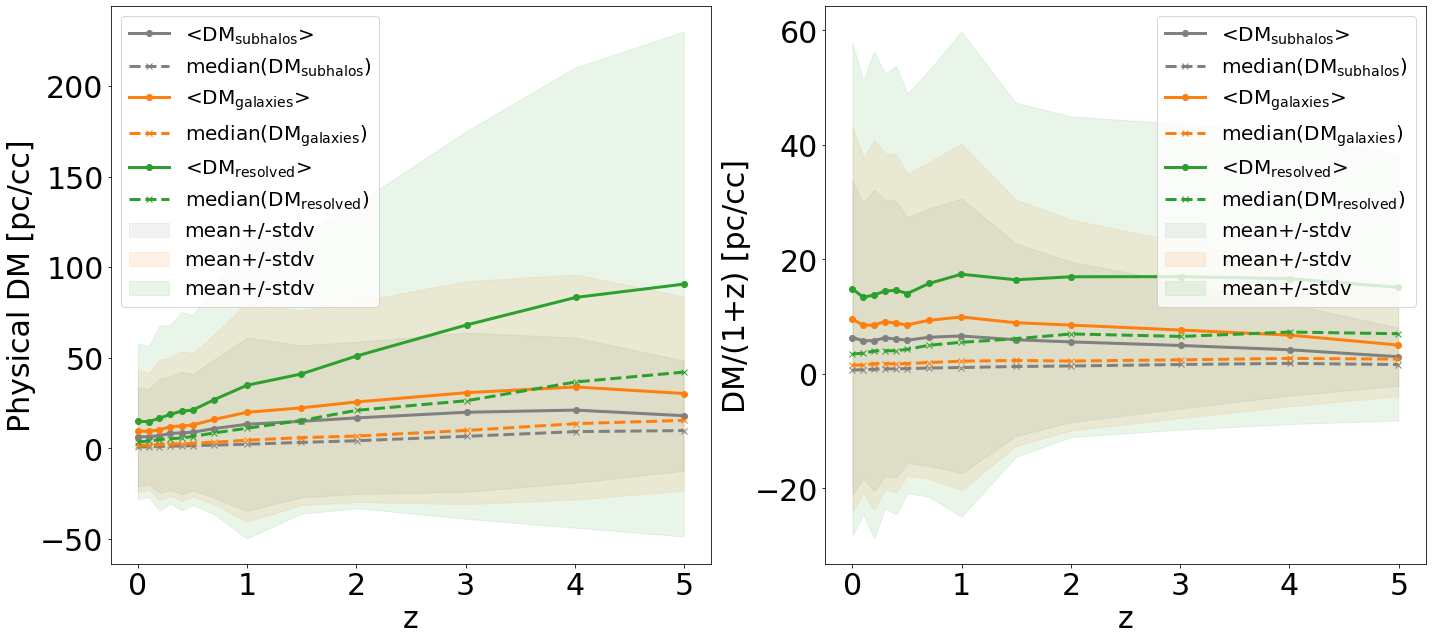

In [15]:
###################
#Initialise figure#
###################

fig = plt.figure(figsize=(20,9))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('z',fontsize=30)
ax1.set_ylabel('Physical DM [pc/cc]',fontsize=30)
ax1.tick_params(axis='both',which='major',labelsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('z',fontsize=30)
ax2.set_ylabel('DM/(1+z) [pc/cc]',fontsize=30)
ax2.tick_params(axis='both',which='major',labelsize=30)

##############################################
#Plot average DM acquired while propagating a#
#distance of the simulation length by cells  #
#associated with subhalos at a given redshift#
##############################################

ax1.plot(z_arr,sh_mean_DMs,lw=3,ls='-',marker='o',color='grey',label=r'<$\rm{DM_{subhalos}}$>')
ax1.plot(z_arr,sh_medi_DMs,lw=3,ls='--',marker='x',color='grey',label=r'median($\rm{DM_{subhalos}}$)')
ax1.fill_between(z_arr,sh_mean_DMs+sh_stdv_DMs,sh_mean_DMs-sh_stdv_DMs,alpha=0.1,color='grey',label='mean+/-stdv')

ax1.plot(z_arr,gal_mean_DMs,lw=3,ls='-',marker='o',color='C1',label=r'<$\rm{DM_{galaxies}}$>')
ax1.plot(z_arr,gal_medi_DMs,lw=3,ls='--',marker='x',color='C1',label=r'median($\rm{DM_{galaxies}}$)')
ax1.fill_between(z_arr,gal_mean_DMs+gal_stdv_DMs,gal_mean_DMs-gal_stdv_DMs,alpha=0.1,color='C1',label='mean+/-stdv')

ax1.plot(z_arr,wrg_mean_DMs,lw=3,ls='-',marker='o',color='C2',label=r'<$\rm{DM_{resolved}}$>')
ax1.plot(z_arr,wrg_medi_DMs,lw=3,ls='--',marker='x',color='C2',label=r'median($\rm{DM_{resolved}}$)')
ax1.fill_between(z_arr,wrg_mean_DMs+wrg_stdv_DMs,wrg_mean_DMs-wrg_stdv_DMs,alpha=0.1,color='C2',label='mean+/-stdv')

##############################################################
#Plot everything/(1+z) (should be the observed contribution?)#
##############################################################
#Note: must make sure the maths is ok

ax2.plot(z_arr,sh_mean_DMs/(1+z_arr),lw=3,ls='-',marker='o',color='grey',label=r'<$\rm{DM_{subhalos}}$>')
ax2.plot(z_arr,sh_medi_DMs/(1+z_arr),lw=3,ls='--',marker='x',color='grey',label=r'median($\rm{DM_{subhalos}}$)')
ax2.fill_between(z_arr,sh_mean_DMs/(1+z_arr)+sh_stdv_DMs/(1+z_arr),sh_mean_DMs/(1+z_arr)-sh_stdv_DMs/(1+z_arr),alpha=0.1,color='grey',label='mean+/-stdv')

ax2.plot(z_arr,gal_mean_DMs/(1+z_arr),lw=3,ls='-',marker='o',color='C1',label=r'<$\rm{DM_{galaxies}}$>')
ax2.plot(z_arr,gal_medi_DMs/(1+z_arr),lw=3,ls='--',marker='x',color='C1',label=r'median($\rm{DM_{galaxies}}$)')
ax2.fill_between(z_arr,gal_mean_DMs/(1+z_arr)+gal_stdv_DMs/(1+z_arr),gal_mean_DMs/(1+z_arr)-gal_stdv_DMs/(1+z_arr),alpha=0.1,color='C1',label='mean+/-stdv')

ax2.plot(z_arr,wrg_mean_DMs/(1+z_arr),lw=3,ls='-',marker='o',color='C2',label=r'<$\rm{DM_{resolved}}$>')
ax2.plot(z_arr,wrg_medi_DMs/(1+z_arr),lw=3,ls='--',marker='x',color='C2',label=r'median($\rm{DM_{resolved}}$)')
ax2.fill_between(z_arr,wrg_mean_DMs/(1+z_arr)+wrg_stdv_DMs/(1+z_arr),wrg_mean_DMs/(1+z_arr)-wrg_stdv_DMs/(1+z_arr),alpha=0.1,color='C2',label='mean+/-stdv')


ax1.legend(fontsize=20)
ax2.legend(fontsize=20)

fig.tight_layout()
plt.savefig('Paper_Plot_DM_of_traversed_subhalos.png',format='png')
fig.show()

# plot statistics of medians and 90th percentiles

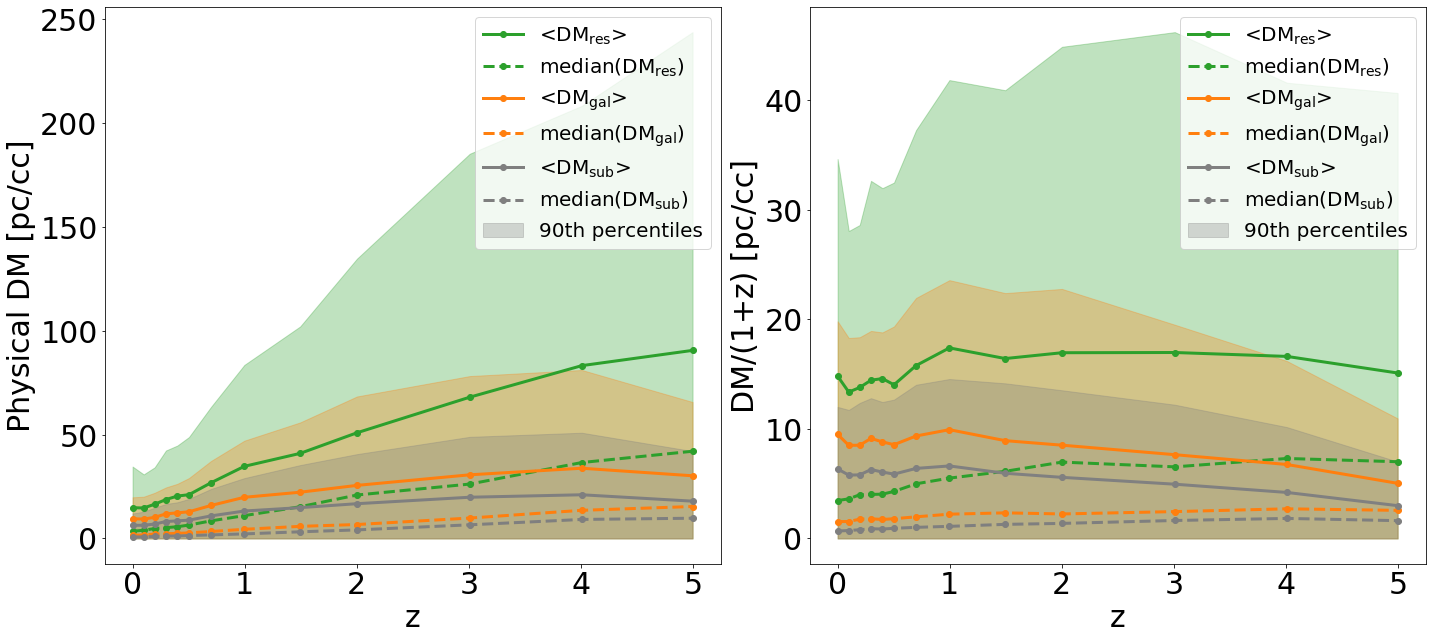

In [37]:
###################
#Initialise figure#
###################

fig = plt.figure(figsize=(20,9))

ax1 = fig.add_subplot(121)
ax1.set_xlabel('z',fontsize=30)
ax1.set_ylabel('Physical DM [pc/cc]',fontsize=30)
ax1.tick_params(axis='both',which='major',labelsize=30)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('z',fontsize=30)
ax2.set_ylabel('DM/(1+z) [pc/cc]',fontsize=30)
ax2.tick_params(axis='both',which='major',labelsize=30)

##############################################
#Plot average DM acquired while propagating a#
#distance of the simulation length by cells  #
#associated with subhalos at a given redshift#
##############################################




ax1.plot(z_arr,wrg_mean_DMs,lw=3,ls='-',marker='o',color='C2',label=r'<$\rm{DM_{res}}$>')
ax1.plot(z_arr,wrg_medi_DMs,lw=3,ls='--',marker='o',color='C2',label=r'median($\rm{DM_{res}}$)')
ax1.fill_between(z_arr,
                 np.zeros_like(z_arr),
                 wrg_90pc_DMs,
                 color='C2',
                 alpha=0.3)

ax1.plot(z_arr,gal_mean_DMs,lw=3,ls='-',marker='o',color='C1',label=r'<$\rm{DM_{gal}}$>')
ax1.plot(z_arr,gal_medi_DMs,lw=3,ls='--',marker='o',color='C1',label=r'median($\rm{DM_{gal}}$)')
ax1.fill_between(z_arr,
                 np.zeros_like(z_arr),
                 gal_90pc_DMs,
                 color='C1',
                 alpha=0.3)

ax1.plot(z_arr,sh_mean_DMs,lw=3,ls='-',marker='o',color='C7',label=r'<$\rm{DM_{sub}}$>')
ax1.plot(z_arr,sh_medi_DMs,lw=3,ls='--',marker='o',color='C7',label=r'median($\rm{DM_{sub}}$)')
ax1.fill_between(z_arr,
                 np.zeros_like(z_arr),
                 sh_90pc_DMs,
                 color='C7',
                 alpha=0.3,
                 label='90th percentiles')

##############################################################
#Plot everything/(1+z) (should be the observed contribution?)#
##############################################################
#Note: must make sure the maths is ok

ax2.plot(z_arr,wrg_mean_DMs/(1+z_arr),lw=3,ls='-',marker='o',color='C2',label=r'<$\rm{DM_{res}}$>')
ax2.plot(z_arr,wrg_medi_DMs/(1+z_arr),lw=3,ls='--',marker='o',color='C2',label=r'median($\rm{DM_{res}}$)')
ax2.fill_between(z_arr,
                 np.zeros_like(z_arr),
                 wrg_90pc_DMs/(1+z_arr),
                 color='C2',
                 alpha=0.3)

ax2.plot(z_arr,gal_mean_DMs/(1+z_arr),lw=3,ls='-',marker='o',color='C1',label=r'<$\rm{DM_{gal}}$>')
ax2.plot(z_arr,gal_medi_DMs/(1+z_arr),lw=3,ls='--',marker='o',color='C1',label=r'median($\rm{DM_{gal}}$)')
ax2.fill_between(z_arr,
                 np.zeros_like(z_arr),
                 gal_90pc_DMs/(1+z_arr),
                 color='C1',
                 alpha=0.3)

ax2.plot(z_arr,sh_mean_DMs/(1+z_arr),lw=3,ls='-',marker='o',color='grey',label=r'<$\rm{DM_{sub}}$>')
ax2.plot(z_arr,sh_medi_DMs/(1+z_arr),lw=3,ls='--',marker='o',color='C7',label=r'median($\rm{DM_{sub}}$)')
ax2.fill_between(z_arr,
                 np.zeros_like(z_arr),
                 sh_90pc_DMs/(1+z_arr),
                 color='C7',
                 alpha=0.3,
                 label='90th percentiles')

ax1.legend(fontsize=20)
ax2.legend(fontsize=20)

fig.tight_layout()
plt.savefig('Paper_Plot_DM_of_traversed_subhalos.png',format='png')
fig.show()